# Generate Choice file for all participants (pet experiment)


In [4]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF
# Useful to quickly extract csv files
import glob
import os

In [5]:
# Extract Rate data

In [6]:
# Load data all participants

#choiceNameFrames = glob.glob('/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S01/*_ChoiceData_PFT_RateChoice_MRI_Exp_*.csv')
#rateNameFrames = glob.glob('/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S01/S*_RateData_PFT_RateChoice_MRI_Exp_*.csv')
#rateNameFrames.sort()
#choiceNameFrames.sort()

In [9]:
# Load data participants

select_subj = range(3,39) 

rateNameFrames = list()
choiceNameFrames = list()

for i in np.arange(len(select_subj)):
    choiceNameFrames1 = glob.glob('/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S'+str(select_subj[i]).zfill(2)+'/*_ChoiceData_PFT_RateChoice_MRI_Exp_*.csv')
    rateNameFrames1 = glob.glob('/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S'+str(select_subj[i]).zfill(2)+'/S*_RateData_PFT_RateChoice_MRI_Exp_*.csv')
    
    rateNameFrames1.sort()
    choiceNameFrames1.sort()
    
    rateNameFrames.extend(rateNameFrames1)
    choiceNameFrames.extend(choiceNameFrames1)


In [10]:
choiceNameFrames

['/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S03/S03_ChoiceData_PFT_RateChoice_MRI_Exp_0.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S03/S03_ChoiceData_PFT_RateChoice_MRI_Exp_1.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S03/S03_ChoiceData_PFT_RateChoice_MRI_Exp_2.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S03/S03_ChoiceData_PFT_RateChoice_MRI_Exp_3.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S03/S03_ChoiceData_PFT_RateChoice_MRI_Exp_4.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S03/S03_ChoiceData_PFT_RateChoice_MRI_Exp_5.csv',
 '/Users/pradyumna/One

In [11]:
rateNameFrames

['/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S03/S03_RateData_PFT_RateChoice_MRI_Exp_0.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S03/S03_RateData_PFT_RateChoice_MRI_Exp_1.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S03/S03_RateData_PFT_RateChoice_MRI_Exp_2.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S03/S03_RateData_PFT_RateChoice_MRI_Exp_3.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S03/S03_RateData_PFT_RateChoice_MRI_Exp_4.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S03/S03_RateData_PFT_RateChoice_MRI_Exp_5.csv',
 '/Users/pradyumna/OneDrive - Univ

## Join rating in this case

### ** Only for participant 1 (first scanner pilot) problem in even sessions , the rating appears flipped (1 when it should be 4 and viceversa), should be corrected (5 - originalRating = realRating) .

In [12]:
partic_num=len(rateNameFrames) #number of participants

rateFrameRawAll = pd.DataFrame( )
choiceFrameRawAll = pd.DataFrame( )

for j in range (partic_num):
    rateFrames = pd.read_csv(rateNameFrames[j])
    choiceFrames = pd.read_csv(choiceNameFrames[j]) 
    
   # print (rateFrames.rating)
    
    if 'ratL' in choiceFrames.columns:
        if 'ratR' in choiceFrames.columns:
            choiceFrames = choiceFrames.drop(['ratL', 'ratR'], axis=1)
   
    partNamesRate = [int(os.path.basename(choiceNameFrames[j])[1:3])]*len(rateFrames)
    partNamesChoice = [int(os.path.basename(rateNameFrames[j])[1:3])]*len(choiceFrames)

    sessionRate = [int(os.path.basename(choiceNameFrames[j])[-5])]*len(rateFrames)
    sessionChoice = [int(os.path.basename(rateNameFrames[j])[-5])]*len(choiceFrames)

    
    rateFrames['part'] = partNamesRate 
    choiceFrames['part'] = partNamesChoice 

    rateFrames['session'] = sessionRate 
    choiceFrames['session'] = sessionChoice 

    
    # to fix rating in wrong participant
    if np.unique(partNamesRate) == 1 and np.unique(sessionRate)[0]%2 == 1: # participant 1 is the conflictive one.
        ratingFixed = 5 - rateFrames.rating.values
        rateFrames['rating'] = [-1 if x==6 else x for x in ratingFixed]
        print('into')

        
 #   print (rateFrames.rating)

        
    choiceFrameRawAll = pd.concat([choiceFrameRawAll,choiceFrames],ignore_index=True)
    rateFrameRawAll = pd.concat([rateFrameRawAll,rateFrames],ignore_index=True)

In [13]:
choiceFrameRawAll

,trial,trialOnset,leftId,rightId,frame,trialOnsetTim,trialSnd1Tim,trialSnd2Tim,trialThinkTime,trialRespTime,trialEnd,choice,choiceTime,primerSound,part,session
0,0.0,122.379519,6.0,2.0,2.0,0.008605,1.020741,1.521760,3.507088,3.507591,10.013129,1.0,6.394748,2.0,3,0
1,1.0,132.529415,5.0,6.0,1.0,0.010511,1.030361,1.531569,3.515307,3.515657,11.006220,1.0,4.217651,1.0,3,0
2,2.0,144.129619,6.0,2.0,1.0,0.006901,1.023841,1.525057,3.508854,3.509187,12.000181,1.0,5.529628,2.0,3,0
3,3.0,157.180464,5.0,6.0,2.0,0.006823,1.034679,1.535908,3.501897,3.502245,12.010674,-1.0,3.821031,1.0,3,0
4,4.0,187.631265,5.0,2.0,1.0,0.007589,1.038964,1.540185,3.510868,3.511215,10.001466,1.0,3.865194,1.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5179,19.0,478.235299,2.0,5.0,1.0,0.007823,1.040944,1.541376,3.506742,3.506945,12.008694,-1.0,3.858621,2.0,38,5
5180,20.0,491.285179,2.0,5.0,1.0,0.007053,1.042375,1.542536,3.508575,3.508830,11.008966,-1.0,3.793193,1.0,38,5
5181,21.0,520.285970,5.0,2.0,2.0,0.007720,1.046842,1.547278,3.509317,3.509674,11.009427,-1.0,4.527394,1.0,38,5
5182,22.0,559.437991,1.0,6.0,2.0,0.007583,1.025633,1.526989,3.507663,3.507868,12.008982,1.0,5.276974,1.0,38,5


In [14]:
rateFrameRawAll

,Unnamed: 0,trial,trialOnset,picId,picNum,frame,rating,trialImageOnst,trialRateOnst,trialRatEnd,trialEnd,part,session
0,0,1.0,44.076331,2.0,19.0,2.0,-1.0,0.506422,-1.000000,-1.000000,5.526733,3,0
1,1,2.0,49.876386,5.0,23.0,2.0,-1.0,0.592569,-1.000000,-1.000000,7.532760,3,0
2,2,3.0,58.577081,1.0,23.0,2.0,-1.0,0.559897,-1.000000,-1.000000,7.523443,3,0
3,3,4.0,67.277551,2.0,22.0,2.0,-1.0,0.592006,-1.000000,-1.000000,6.528843,3,0
4,4,5.0,74.527260,5.0,17.0,2.0,2.0,0.561690,5.602757,7.988394,11.524112,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6907,27,28.0,531.887218,5.0,36.0,2.0,-1.0,0.558454,-1.000000,-1.000000,5.524530,38,5
6908,28,29.0,537.686910,6.0,38.0,2.0,-1.0,0.558328,-1.000000,-1.000000,7.524955,38,5
6909,29,30.0,546.387002,6.0,35.0,1.0,-1.0,0.559159,-1.000000,-1.000000,6.526137,38,5
6910,30,31.0,553.637048,1.0,36.0,2.0,-1.0,0.559280,-1.000000,-1.000000,5.526341,38,5


In [15]:
data_expL = rateFrameRawAll.loc[(rateFrameRawAll['frame'] == 1)] # 1 = Like, 2 = Dislike

<AxesSubplot:>

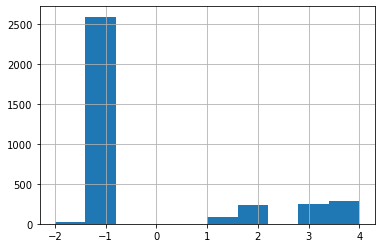

In [16]:
data_expL.rating.hist()

In [17]:
choiceFrameAll = pd.DataFrame( columns = ['trial','leftId','rightId','frame','endTime','choice','choiceTime','LRat1','RRat1','LRat2','RRat2','LVar1','RVar1','LVar2','RVar2','Part'])
idFrameAll = pd.DataFrame( columns = ['nameId','rat1','rat2','var1','var2','Part'])

In [18]:
for j in list (choiceFrameRawAll.part.unique()):
    
    idNames = list(rateFrameRawAll.picId.unique())
    IdRatings1 = [None]*len(idNames)
    IdRatings2 = [None]*len(idNames)
    IdRatingsVar1 = [None]*len(idNames)
    IdRatingsVar2 = [None]*len(idNames)
    IdRatingsAll1 = [None]*len(idNames)
    IdRatingsAll2 = [None]*len(idNames)

    #extract average rating for like, dislike
    for i in range(len(idNames)):
        IdRatings1[i] = rateFrameRawAll.loc[(rateFrameRawAll['picId'] == idNames[i]) & (rateFrameRawAll['frame'] == 1) & (rateFrameRawAll['part'] == j) & (rateFrameRawAll['rating'] >= 0)].rating.mean()
        IdRatings2[i] = rateFrameRawAll.loc[(rateFrameRawAll['picId'] == idNames[i]) & (rateFrameRawAll['frame'] == 2) & (rateFrameRawAll['part'] == j) & (rateFrameRawAll['rating'] >= 0)].rating.mean()
        #print(rateFrameRawAll.loc[(rateFrameRawAll['picId'] == idNames[i]) & (rateFrameRawAll['frame'] == 1) & (rateFrameRawAll['part'] == j) & (rateFrameRawAll['rating'] >= 0)].rating)
        IdRatingsVar1[i] = rateFrameRawAll.loc[(rateFrameRawAll['picId'] == idNames[i]) & (rateFrameRawAll['frame'] == 1) & (rateFrameRawAll['part'] == j) & (rateFrameRawAll['rating'] >= 0)].rating.std()
        IdRatingsVar2[i] = rateFrameRawAll.loc[(rateFrameRawAll['picId'] == idNames[i]) & (rateFrameRawAll['frame'] == 2) & (rateFrameRawAll['part'] == j) & (rateFrameRawAll['rating'] >= 0)].rating.std()

        IdRatingsAll1[i] = np.array(rateFrameRawAll.loc[(rateFrameRawAll['picId'] == idNames[i]) & (rateFrameRawAll['frame'] == 1) & (rateFrameRawAll['part'] == j) & (rateFrameRawAll['rating'] >= 0)].rating.values)
        IdRatingsAll2[i] = np.array(rateFrameRawAll.loc[(rateFrameRawAll['picId'] == idNames[i]) & (rateFrameRawAll['frame'] == 2) & (rateFrameRawAll['part'] == j) & (rateFrameRawAll['rating'] >= 0)].rating.values)
    
        
    rateValues = pd.DataFrame( {'nameId': idNames,'rat1': IdRatings1,'rat2': IdRatings2,'var1': IdRatingsVar1,'var2': IdRatingsVar2,'AllRatings1':IdRatingsAll1,'AllRatings2':IdRatingsAll2})
    rateValues['Part'] = [j]*len(rateValues)    
    
    # save information about celebs and ratings
    
    idFrameAll = pd.concat([idFrameAll,rateValues],ignore_index=True)
    
    choiceFrames = choiceFrameRawAll.loc[ (choiceFrameRawAll['part'] == j)]
    
    # separate ratings and rating-variability for each frame
    ChoiceLRat1 = [None]*len(choiceFrames)
    ChoiceRRat1 = [None]*len(choiceFrames)
    ChoiceLRat2 = [None]*len(choiceFrames)
    ChoiceRRat2 = [None]*len(choiceFrames)

    ChoiceLVar1 = [None]*len(choiceFrames)
    ChoiceRVar1 = [None]*len(choiceFrames)
    ChoiceLVar2 = [None]*len(choiceFrames)
    ChoiceRVar2 = [None]*len(choiceFrames)
    
    for i in range(len(choiceFrames)):
        
        choiceL = choiceFrames.iloc[i].leftId
        choiceR = choiceFrames.iloc[i].rightId
        
        if any((rateValues['nameId'] == choiceL)) and any((rateValues['nameId'] == choiceR)):
        
            ChoiceLRat1[i] = rateValues.loc[(rateValues['nameId'] == choiceL)].rat1.values[0]
            ChoiceRRat1[i] = rateValues.loc[(rateValues['nameId'] == choiceR)].rat1.values[0]
            ChoiceLRat2[i] = rateValues.loc[(rateValues['nameId'] == choiceL)].rat2.values[0]
            ChoiceRRat2[i] = rateValues.loc[(rateValues['nameId'] == choiceR)].rat2.values[0]
            
            ChoiceLVar1[i] = rateValues.loc[(rateValues['nameId'] == choiceL)].var1.values[0]
            ChoiceRVar1[i] = rateValues.loc[(rateValues['nameId'] == choiceR)].var1.values[0]
            ChoiceLVar2[i] = rateValues.loc[(rateValues['nameId'] == choiceL)].var2.values[0]
            ChoiceRVar2[i] = rateValues.loc[(rateValues['nameId'] == choiceR)].var2.values[0]

    choiceFrames['LRat1'] = ChoiceLRat1
    choiceFrames['RRat1'] = ChoiceRRat1
    choiceFrames['LRat2'] = ChoiceLRat2
    choiceFrames['RRat2'] = ChoiceRRat2 
    
    choiceFrames['LVar1'] = ChoiceLVar1
    choiceFrames['RVar1'] = ChoiceRVar1
    choiceFrames['LVar2'] = ChoiceLVar2
    choiceFrames['RVar2'] = ChoiceRVar2
     
    choiceFrames['Part'] = [j]*len(choiceFrames)    

    choiceFrameAll = pd.concat([choiceFrameAll,choiceFrames],ignore_index=True)
    

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [19]:
choiceFrameAll

,trial,leftId,rightId,frame,endTime,choice,choiceTime,LRat1,RRat1,LRat2,...,trialOnset,trialOnsetTim,trialSnd1Tim,trialSnd2Tim,trialThinkTime,trialRespTime,trialEnd,primerSound,part,session
0,0.0,6.0,2.0,2.0,NaN,1.0,6.394748,1.666667,2.333333,2.833333,...,122.379519,0.008605,1.020741,1.521760,3.507088,3.507591,10.013129,2.0,3.0,0.0
1,1.0,5.0,6.0,1.0,NaN,1.0,4.217651,1.500000,1.666667,2.666667,...,132.529415,0.010511,1.030361,1.531569,3.515307,3.515657,11.006220,1.0,3.0,0.0
2,2.0,6.0,2.0,1.0,NaN,1.0,5.529628,1.666667,2.333333,2.833333,...,144.129619,0.006901,1.023841,1.525057,3.508854,3.509187,12.000181,2.0,3.0,0.0
3,3.0,5.0,6.0,2.0,NaN,-1.0,3.821031,1.500000,1.666667,2.666667,...,157.180464,0.006823,1.034679,1.535908,3.501897,3.502245,12.010674,1.0,3.0,0.0
4,4.0,5.0,2.0,1.0,NaN,1.0,3.865194,1.500000,2.333333,2.666667,...,187.631265,0.007589,1.038964,1.540185,3.510868,3.511215,10.001466,1.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5179,19.0,2.0,5.0,1.0,NaN,-1.0,3.858621,3.166667,2.833333,2.333333,...,478.235299,0.007823,1.040944,1.541376,3.506742,3.506945,12.008694,2.0,38.0,5.0
5180,20.0,2.0,5.0,1.0,NaN,-1.0,3.793193,3.166667,2.833333,2.333333,...,491.285179,0.007053,1.042375,1.542536,3.508575,3.508830,11.008966,1.0,38.0,5.0
5181,21.0,5.0,2.0,2.0,NaN,-1.0,4.527394,2.833333,3.166667,2.000000,...,520.285970,0.007720,1.046842,1.547278,3.509317,3.509674,11.009427,1.0,38.0,5.0
5182,22.0,1.0,6.0,2.0,NaN,1.0,5.276974,2.666667,3.000000,1.600000,...,559.437991,0.007583,1.025633,1.526989,3.507663,3.507868,12.008982,1.0,38.0,5.0


# Save file

In [20]:
idFrameAll

,nameId,rat1,rat2,var1,var2,Part,AllRatings1,AllRatings2
0,2.0,2.333333,2.666667,0.516398,0.516398,3,"[3.0, 2.0, 3.0, 2.0, 2.0, 2.0]","[3.0, 2.0, 2.0, 3.0, 3.0, 3.0]"
1,5.0,1.500000,2.666667,0.547723,0.816497,3,"[1.0, 1.0, 2.0, 2.0, 1.0, 2.0]","[2.0, 3.0, 2.0, 2.0, 3.0, 4.0]"
2,1.0,3.333333,1.833333,0.816497,0.752773,3,"[4.0, 3.0, 4.0, 2.0, 3.0, 4.0]","[2.0, 1.0, 1.0, 3.0, 2.0, 2.0]"
3,6.0,1.666667,2.833333,0.516398,0.752773,3,"[2.0, 2.0, 2.0, 2.0, 1.0, 1.0]","[2.0, 2.0, 3.0, 3.0, 4.0, 3.0]"
4,2.0,3.333333,2.500000,0.516398,0.547723,4,"[4.0, 3.0, 3.0, 3.0, 4.0, 3.0]","[2.0, 2.0, 3.0, 3.0, 2.0, 3.0]"
...,...,...,...,...,...,...,...,...
139,6.0,2.000000,2.500000,0.000000,0.547723,37,"[2.0, 2.0, 2.0, 2.0, 2.0, 2.0]","[2.0, 2.0, 2.0, 3.0, 3.0, 3.0]"
140,2.0,3.166667,2.333333,0.752773,0.816497,38,"[4.0, 3.0, 4.0, 3.0, 3.0, 2.0]","[3.0, 1.0, 2.0, 3.0, 3.0, 2.0]"
141,5.0,2.833333,2.000000,0.752773,0.632456,38,"[3.0, 3.0, 3.0, 2.0, 4.0, 2.0]","[2.0, 3.0, 1.0, 2.0, 2.0, 2.0]"
142,1.0,2.666667,1.600000,1.211060,0.547723,38,"[1.0, 2.0, 4.0, 4.0, 3.0, 2.0]","[2.0, 1.0, 1.0, 2.0, 2.0]"


In [21]:
choiceFrameAll.loc[(choiceFrameAll['Part'] == 5)]

,trial,leftId,rightId,frame,endTime,choice,choiceTime,LRat1,RRat1,LRat2,...,trialOnset,trialOnsetTim,trialSnd1Tim,trialSnd2Tim,trialThinkTime,trialRespTime,trialEnd,primerSound,part,session
288,0.0,5.0,2.0,2.0,NaN,-1.0,4.700667,3.000000,3.166667,1.333333,...,153.283401,0.007656,1.017470,1.517946,3.514256,3.514461,12.005064,1.0,5.0,0.0
289,1.0,2.0,1.0,1.0,NaN,NaN,NaN,3.166667,3.333333,1.833333,...,186.634779,0.007888,1.036552,1.537079,3.507854,3.508055,12.015611,1.0,5.0,0.0
290,2.0,5.0,1.0,1.0,NaN,-1.0,4.077286,3.000000,3.333333,1.333333,...,227.236437,0.007515,1.040135,1.540240,3.508186,3.508399,11.015460,1.0,5.0,0.0
291,3.0,6.0,1.0,2.0,NaN,1.0,4.719449,3.833333,3.333333,1.000000,...,256.237530,0.007520,1.026284,1.526721,3.516368,3.516576,11.006566,2.0,5.0,0.0
292,4.0,5.0,2.0,1.0,NaN,1.0,3.561373,3.000000,3.166667,1.333333,...,267.837741,0.007319,1.027879,1.528016,3.509060,3.509313,12.000505,2.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,19.0,1.0,5.0,2.0,NaN,1.0,4.747939,3.333333,3.000000,1.800000,...,512.635091,0.007386,1.040079,1.540649,3.512028,3.512210,12.002263,1.0,5.0,5.0
428,20.0,6.0,5.0,1.0,NaN,1.0,3.857897,3.833333,3.000000,1.000000,...,525.685852,0.007334,1.024664,1.524865,3.505204,3.505407,12.013255,1.0,5.0,5.0
429,21.0,1.0,5.0,1.0,NaN,1.0,3.818442,3.333333,3.000000,1.800000,...,538.735869,0.007475,1.026663,1.526833,3.500570,3.500778,11.007226,2.0,5.0,5.0
430,22.0,5.0,1.0,2.0,NaN,1.0,4.212250,3.000000,3.333333,1.333333,...,559.036788,0.006972,1.015678,1.515874,3.510647,3.510935,10.006882,2.0,5.0,5.0


In [22]:
choiceFrameAll.to_csv('/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/All_Behavioral/PFT_Choice_ScanPart_All.csv',index = False)
idFrameAll.to_csv('/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/All_Behavioral/PFT_idRatingsFrame_ScanPart_All.csv',index = False)

## -- [end ] 